## Representación de Datos

In [99]:
# library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json

 
from funciones_scraping import get_languages


### Coste en tiempo de cada iteración

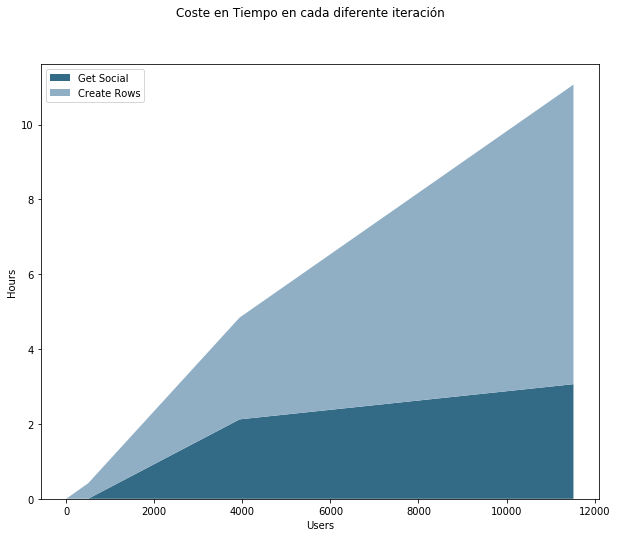

In [112]:
# https://www.canva.com/learn/100-color-combinations/
# https://material.io/design/color/the-color-system.html#tools-for-picking-colors
# https://matplotlib.org/users/colors.html

mpl.rcParams['axes.prop_cycle']

# Timeit
x_num_users = [0, 500, 3939, 11520]
y_social = [0, 3847,  7642800, 11027477] # get social
y_dfrows = [0, 1494739, 9796075, 28818747] # create rows

ys = [t/3600000 for t in y_social] # get social
yr = [t/3600000 for t in y_dfrows] # create rows
y = [ys, yr]
 
# Plot
fig, ax = plt.subplots(figsize=(10,8))
plt.stackplot(x,y, labels=['Get Social','Create Rows'], colors=['#336b87', '#90afc5'])
plt.grid(False)
plt.legend(loc='upper left')
plt.suptitle('Coste en Tiempo en cada diferente iteración')
plt.xlabel('Users')
plt.ylabel('Hours')
plt.savefig('../output/Coste-tiempo-iteracion.png')
plt.show()


### D3

In [3]:
# languages = [lang for lang in get_languages() if lang in df.columns]
# languages

In [4]:
# {"name": "php", "size": 2},
def create_d3(data): 
    df = data
    idiomas = []
    languages = [lang for lang in get_languages() if lang in df.columns]
    for col in languages: 
        idiomas.append({'name': col, "size": int(df[col].sum())})
    res = {"name": "Lenguajes","children": [{"name": "Lenguajes","children": [{"name": "Lenguajes","children": idiomas}]}]}
    
    return json.dumps(res, ensure_ascii=False)

def save_d3_languages_json(lang_json, filename='../representacion_d3/lenguajes.json'): 
    with open(filename, 'w') as f: 
        f.write(lang_json)

In [7]:
df = pd.read_csv('../output/df-limpio-iter3.csv', index_col=0)
save_d3_languages_json(create_d3(df))

In [6]:
# file:///home/alberto/Escritorio/IH/proyecto-final-IH/representacion_d3/treemap.html

### Grafo de aliados

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import requests
import json
from bs4 import BeautifulSoup
from IPython.display import display

def get_social(user): 
    res = set()
    for link in ['following', 'followers', 'allies']: 
        url = 'https://www.codewars.com/users/{}/{}'.format(user, link)
        html = requests.get(url).content

        soup = BeautifulSoup(html, "lxml")
        res = res.union({e.text for e in soup.select('table a')})
    return res

In [70]:
def create_rows_graph(list_users): 
    x = []
    y = []
    for user in list_users: 
        social = get_social(user)
        for s in social: 
            x.append(user)
            y.append(s)
    return x, y

In [89]:
x, y = create_rows_graph(['albertogcmr', 'boyander', 'g964'])


In [91]:
df_social = pd.DataFrame({'from': x, 'to': y})
df_social.head()

,from,to
0,albertogcmr,Tommytrg
1,albertogcmr,J4CODE
2,albertogcmr,papuarza
3,albertogcmr,boyander
4,albertogcmr,evapanizo


/home/alberto/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


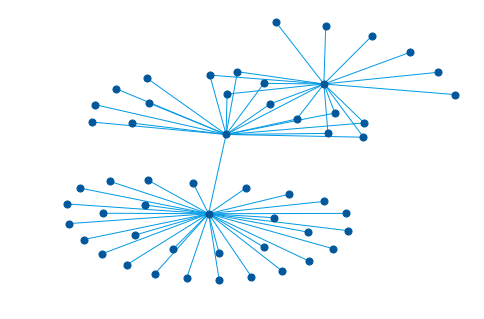

In [96]:
# https://python-graph-gallery.com/network-chart/

G = nx.from_pandas_edgelist(df=df_social, source='from', target='to', create_using=nx.Graph())

nx.draw_kamada_kawai(G, node_size=50, node_color='#01579B', edge_color='#039BE5', with_labels=False)